In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
char = pd.read_csv('char_data.txt', sep=" ", header=None)
swap = pd.read_csv('swap_data.txt', sep=" ", header=None)

char

,0,1,2
0,0.00015,-1.010790e-04,3.377207e-06
1,0.00045,-1.144831e-04,3.901794e-06
2,0.00075,-1.233848e-04,2.472900e-06
3,0.00105,-1.236858e-04,3.421965e-06
4,0.00135,-1.203880e-04,3.878780e-06
...,...,...,...
995,0.29865,-1.599863e-06,3.711468e-07
996,0.29895,-6.998987e-07,2.603162e-07
997,0.29925,-1.399854e-06,3.399025e-07
998,0.29955,-1.299872e-06,2.999763e-07


In [3]:
L = 20 #Longitud total del cubo
beta = 0.264241  #integral de maxwell entre 0 y kT
divs = 500
cte = divs*divs*divs*beta/(4*L)
print(cte)


412876.5625


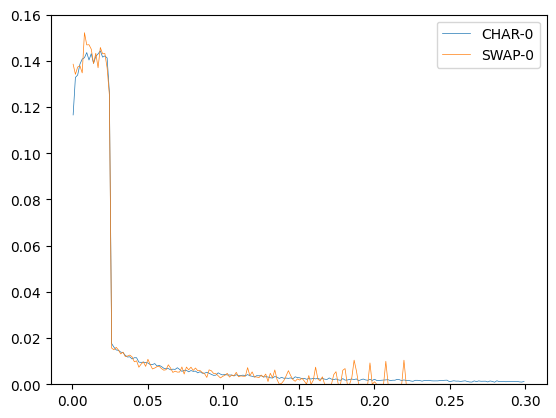

In [6]:
def maxwell_boltzmann(energy, kt):
    return energy/(kt*kt) * np.exp(-energy/kt)

charplot = char[1]*1000
swapplot = swap[1]/maxwell_boltzmann(swap[0], 8.617333e-5*294.0)*cte*100/0.03
charerr = char[2]*1000
swaperr = swap[2]/maxwell_boltzmann(swap[0], 8.617333e-5*294.0)*cte*1000/0.03

charx = char[0]
swapx = swap[0]

# for charplot and swapplot, reduce the amount of bines 5 times by getting the averages of 5 bins
charplot = np.mean(charplot.values.reshape(-1, 5), axis=1)
swapplot = np.mean(swapplot.values.reshape(-1, 5), axis=1)
charerr = np.mean(charerr.values.reshape(-1, 5), axis=1)
swaperr = np.mean(swaperr.values.reshape(-1, 5), axis=1)

charx = np.mean(charx.values.reshape(-1, 5), axis=1)
swapx = np.mean(swapx.values.reshape(-1, 5), axis=1)



plt.errorbar(charx, -charplot, yerr=charerr, linewidth = 0.5, elinewidth = 0, label='CHAR-0')
plt.errorbar(swapx, swapplot, yerr=swaperr, linewidth = 0.5, elinewidth = 0, label='SWAP-0')
plt.ylim(0,0.16)
plt.legend()



In [7]:
(char[0][1]-char[0][2])/2


-0.00015000000000000001